# Life expectancy vs. death causes vs. health expenditure

### Goal: analyze correlations with life expectancy by country...
- ### & causes of death...
    - Context: The IHME’s Global Burden of Disease (GBD) has developed a standardized approach to the attribution of deaths to specific causes
    - Source: http://ghdx.healthdata.org/gbd-results-tool
    - Inspired by https://ourworldindata.org/causes-of-death

- ### & health expenditure
    - Source: http://apps.who.int/nha/database/Home/IndicatorsDownload/en WHO’s  Global Health Expenditure Database (GHED)

### Load data

In [1]:
FILENAME="annual-number-of-deaths-by-cause.csv"
import pandas as pd
df = pd.read_csv(FILENAME)
df.describe()

,Year,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Terrorism (deaths),Cardiovascular diseases (deaths),Dementia (deaths),Kidney disease (deaths),Respiratory diseases (deaths),...,Neonatal disorders (deaths),Alcohol use disorders (deaths),Natural disasters (deaths),Diarrheal diseases (deaths),Heat (hot and cold exposure) (deaths),Nutritional deficiencies (deaths),Suicide (deaths),Conflict (deaths),Diabetes (deaths),Poisonings (deaths)
count,6686.000000,6468.000000,6.468000e+03,6156.000000,6468.000000,2891.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,...,6.468000e+03,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6.468000e+03,6468.000000
mean,2003.469488,7780.768953,5.852767e+04,3430.235605,7968.171555,349.235905,3.002555e+05,3.460315e+04,1.788960e+04,7.129487e+04,...,4.813689e+04,3525.876073,1032.806516,3.918273e+04,1355.710222,8839.247637,16428.863277,2172.277617,1.948290e+04,1636.750538
std,8.076979,34193.574520,2.326967e+05,19322.536951,35566.546169,1917.143788,1.173251e+06,1.417552e+05,7.101438e+04,3.068237e+05,...,2.115090e+05,14336.535999,11262.768093,1.873208e+05,6023.004366,39182.734641,65583.009738,17511.328435,7.677205e+04,6673.775283
min,1990.000000,0.214225,6.462032e+00,0.002202,0.035425,0.000000,3.767702e+01,2.741968e+00,1.897796e+00,7.297981e+00,...,4.363093e-01,0.293634,0.000000,1.971131e-01,0.098110,0.078023,1.492135,0.000000,2.660915e+00,0.117638
25%,1996.000000,32.844678,6.106540e+02,0.476189,8.939738,0.000000,4.225455e+03,3.398984e+02,2.598338e+02,4.956917e+02,...,2.046254e+02,23.700635,0.000000,3.950165e+01,7.548353,13.854870,187.883497,0.000000,3.618043e+02,13.518640
50%,2003.000000,263.326804,4.313073e+03,6.272934,139.132563,5.000000,1.885626e+04,1.708948e+03,1.339441e+03,2.442531e+03,...,1.791409e+03,158.916099,1.000000,6.339398e+02,56.304225,190.419356,792.613953,1.000045,1.453246e+03,94.992363
75%,2010.000000,2093.966414,1.862988e+04,261.856157,2337.484551,60.000000,8.015074e+04,9.514314e+03,5.230333e+03,1.293316e+04,...,1.308573e+04,696.238005,36.000000,7.544887e+03,216.115514,2516.917188,4082.206487,89.000000,6.433005e+03,387.416193
max,2017.000000,462419.725356,3.415941e+06,215726.866669,548711.952423,44490.000000,1.779095e+07,2.514619e+06,1.230168e+06,3.914196e+06,...,2.986076e+06,190843.575458,248454.699157,2.578292e+06,115382.599926,601954.402277,859246.631195,569177.531650,1.369849e+06,83257.443538


In [2]:
df_y = pd.read_csv('life-expectancy.csv')
df_y

,Entity,Code,Year,Life expectancy (years)
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


### Prepare data

In [3]:
df_xy = df.merge(df_y)
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 0 to 5536
Data columns (total 38 columns):
Entity                                     5537 non-null object
Code                                       5509 non-null object
Year                                       5537 non-null int64
Execution                                  257 non-null object
Meningitis (deaths)                        5516 non-null float64
Lower respiratory infections (deaths)      5516 non-null float64
Intestinal infectious diseases (deaths)    5319 non-null float64
Protein-energy malnutrition (deaths)       5516 non-null float64
Terrorism (deaths)                         2488 non-null float64
Cardiovascular diseases (deaths)           5516 non-null float64
Dementia (deaths)                          5516 non-null float64
Kidney disease (deaths)                    5516 non-null float64
Respiratory diseases (deaths)              5516 non-null float64
Liver diseases (deaths)                    5516 non-nu

- Impute missing (NaNs) with median values
- Skip rows with null values
- Use normalized (scaled) ratios

In [4]:
def replaceNaN(df,mycolumn):
    mymedian = df.iloc[:,mycolumn].dropna().median()
    print("Imputing missing '{}'' with median value {}".format(df.columns[mycolumn],mymedian))
    return df.iloc[:,mycolumn].fillna(mymedian)

df_xy.iloc[:,6] = replaceNaN(df_xy,6)
df_xy.iloc[:,8] = replaceNaN(df_xy,8)

empty_entities = df_xy.iloc[:,-2].isnull()
print("\nWe'll miss null registers from the following entities/countries: {}".format(set(df_xy[empty_entities].Entity.tolist())))
df_xy = df_xy[~empty_entities]

y = df_xy.loc[:,df_xy.columns[-1]]
print("\nWe skip Entity, Code and Year. And also Execution")
x = df_xy.loc[:,df_xy.columns[4:-1]]

Imputing missing 'Intestinal infectious diseases (deaths)'' with median value 3.89402968384
Imputing missing 'Terrorism (deaths)'' with median value 4.0

We'll miss null registers from the following entities/countries: {'French Polynesia', 'Hong Kong', 'Wallis and Futuna', 'Western Sahara', 'Saint Kitts and Nevis', 'New Caledonia', 'French Guiana', 'Martinique', 'Guadeloupe'}

We skip Entity, Code and Year. And also Execution


In [5]:
from sklearn.preprocessing import Normalizer
x = Normalizer().fit_transform(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Regression model based on death causes

In [6]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np

In [7]:
# Create linear regression object (Lasso regularization for shrinkage and variable selection)
model = linear_model.Lasso(alpha=0.01)

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)
# The root mean squared error
print('Root mean squared error: %.2f (years)' % np.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print('Mean absolute error: %.2f (years)' % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-0.         -7.63691775  0.         -0.         -0.         12.95813937
 38.1417821   0.          0.          0.          0.         -0.
 19.30964168  0.         -0.         -1.9273748  -0.         -0.
 -3.67421781  0.         -7.44759533  4.56833109 -0.         -0.83156461
 -0.          0.         -5.33655943 -0.         -0.         -0.
 -0.          0.         -0.        ]
Intercept: 
 51.752233019170305
Root mean squared error: 2.97 (years)
Mean absolute error: 2.18 (years)
Coefficient of determination: 0.90


- Apparently, a (Lasso regularized) logistic regression model with 10 features is able to infer life expectancy with less than 3 years of RMSE.
- These features are normalized ratios of death causes.

Further analysis...

### Analyze results

Get feature importances

In [8]:
df_feature = pd.DataFrame({"Feature":df_xy.columns[4:-1]})
df_feature["coef"] = model.coef_
df_feature["abs_coef"] = abs(model.coef_)
df_feature.sort_values(by="abs_coef", ascending=False)

,Feature,coef,abs_coef
6,Dementia (deaths),38.141782,38.141782
12,Cancers (deaths),19.309642,19.309642
5,Cardiovascular diseases (deaths),12.958139,12.958139
1,Lower respiratory infections (deaths),-7.636918,7.636918
20,Tuberculosis (deaths),-7.447595,7.447595
26,Diarrheal diseases (deaths),-5.336559,5.336559
21,Road injuries (deaths),4.568331,4.568331
18,HIV/AIDS (deaths),-3.674218,3.674218
15,Malaria (deaths),-1.927375,1.927375
23,Neonatal disorders (deaths),-0.831565,0.831565


High 'Dementia' ratios implies higher life expectancy. While 'Tuberculosis' or Diarrheal diseases imply lower life expectancy. It makes sense.

Which predictions get the highest errors with this model?

In [9]:
df_test =  df_xy.loc[y_test.index,:]
df_test["pred"] = y_pred
df_test["error"] = abs(df_test.iloc[:,-1]-df_test.iloc[:,-2])
df_test.sort_values(by="error", ascending=False).head(10)

,Entity,Code,Year,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Terrorism (deaths),Cardiovascular diseases (deaths),...,Diarrheal diseases (deaths),Heat (hot and cold exposure) (deaths),Nutritional deficiencies (deaths),Suicide (deaths),Conflict (deaths),Diabetes (deaths),Poisonings (deaths),Life expectancy (years),pred,error
4334,Sierra Leone,SLE,1994,NaN,2240.186896,8789.392940,200.280263,2547.205128,228.0,6200.524103,...,7870.005780,49.436262,2609.660909,196.654513,2296.000264,433.150959,71.239017,37.158,51.441560,14.283560
4083,Rwanda,RWA,1996,NaN,3236.853346,13795.213797,178.580439,4956.244128,129.0,9231.829935,...,13240.915211,29.707608,5120.413681,850.881899,437.999934,1356.112264,150.342728,35.380,49.390956,14.010956
4331,Sierra Leone,SLE,1991,NaN,2548.618973,9918.059756,232.352024,3120.759126,128.0,6117.398077,...,7973.785575,47.635732,3197.852316,185.433213,1343.999973,395.902356,76.568691,38.122,51.076534,12.954534
3684,Oceania,NaN,2017,NaN,884.648874,7008.784613,3.894030,953.363010,4.0,31885.231823,...,3665.509574,181.238045,980.888116,2510.686385,0.000000,5797.339739,183.385031,78.336,65.942864,12.393136
3678,Oceania,NaN,2011,NaN,898.076561,6675.709297,333.626267,1101.149529,4.0,27753.528508,...,3874.061368,172.370072,1129.921558,2250.203920,0.000000,4814.256951,171.280585,77.043,65.122581,11.920419
3677,Oceania,NaN,2010,NaN,899.951724,6630.739558,337.424158,1138.093927,4.0,27113.338544,...,4045.194115,169.667201,1167.353698,2199.038304,2.124518,4626.565883,169.002761,76.820,64.949050,11.870950
3672,Oceania,NaN,2005,NaN,924.448900,6198.964855,340.765902,1127.044020,4.0,23442.421805,...,3856.856805,148.331547,1151.670042,1925.750264,5.327277,4080.807599,150.840251,75.591,64.482352,11.108648
3671,Oceania,NaN,2004,NaN,889.294624,6023.571654,328.186278,1064.634647,4.0,22661.888310,...,3716.862331,143.597252,1087.880129,1870.192916,3.197889,3874.250545,145.038924,75.321,64.487207,10.833793
3670,Oceania,NaN,2003,NaN,863.555951,5882.452052,330.199424,1030.055597,4.0,21973.853752,...,3631.693624,139.216789,1052.128914,1818.218726,2.132809,3700.176472,140.425084,75.048,64.477582,10.570418
3669,Oceania,NaN,2002,NaN,844.388456,5751.694357,347.664377,1008.998213,4.0,21286.591594,...,3552.210929,134.986059,1029.925184,1764.834845,1.066788,3495.878266,136.131216,74.776,64.462546,10.313454


We have a regression model with 10 relevant features. Could we simplify?

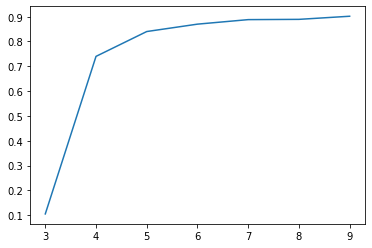

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def eval_truncated_model(df_test,K, index=df_test.index):
    df_test = df_test.loc[index]
    top_features = df_feature.sort_values(by="abs_coef", ascending=False).index[0:K-1]
    myfeatures = Normalizer().fit_transform(df_test.iloc[:,4:-3])

    model.intercept_+np.sum(myfeatures*model.coef_,axis=1)
    y_pred = model.intercept_+np.sum(myfeatures[:,top_features] * model.coef_[top_features], axis=1)
    r2 = r2_score(y_test[index], y_pred)
    return(r2)

myrange = range(3,10)
r2 = [eval_truncated_model(df_test,i) for i in myrange]

plt.plot(myrange,r2)

Previous 'elbow' chart shows that 5 features could be a good trade-off

### Analyze correlation between health expenditure and life expectancy

In [11]:
#! cat health_expenditure_pipe.csv | cut -d'|' -f1,2,6,14-15 | tr "," "." | grep -v ":" > health_expenditure.csv 
df_expenditure =pd.read_csv('health_expenditure.csv', sep='|')
df_expenditure = df_expenditure.dropna()
df_expenditure.columns = ['Entity', 'Code', 'Indicator Code','Year', 'Health expenditure ($ per capita)']
df_expenditure = df_expenditure.astype({'Year':'int64'})
df_expenditure = df_expenditure[df_expenditure["Indicator Code"] == 'sha11.HF'].drop('Entity', axis=1)
df_expenditure.describe()

,Year,Health expenditure ($ per capita)
count,3353.000000,3353.000000
mean,2008.504921,860.003993
std,5.175620,1517.166304
min,2000.000000,3.350789
25%,2004.000000,59.169815
50%,2009.000000,242.401603
75%,2013.000000,795.039367
max,2017.000000,10246.138214


Median health expenditure per capita per year (in 2017 US dollars) is 242$

In [12]:
df_xy_expend = df_xy.merge(df_expenditure)
df_xy_expend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 0 to 3208
Data columns (total 40 columns):
Entity                                     3209 non-null object
Code                                       3209 non-null object
Year                                       3209 non-null int64
Execution                                  218 non-null object
Meningitis (deaths)                        3209 non-null float64
Lower respiratory infections (deaths)      3209 non-null float64
Intestinal infectious diseases (deaths)    3209 non-null float64
Protein-energy malnutrition (deaths)       3209 non-null float64
Terrorism (deaths)                         3209 non-null float64
Cardiovascular diseases (deaths)           3209 non-null float64
Dementia (deaths)                          3209 non-null float64
Kidney disease (deaths)                    3209 non-null float64
Respiratory diseases (deaths)              3209 non-null float64
Liver diseases (deaths)                    3209 non-nu

In [13]:
corr = np.corrcoef(df_xy_expend['Life expectancy (years)'], df_xy_expend['Health expenditure ($ per capita)'])
print(corr)

[[1.         0.54840599]
 [0.54840599 1.        ]]


/home/milhouse/tools/virtualenvs/worldindata/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


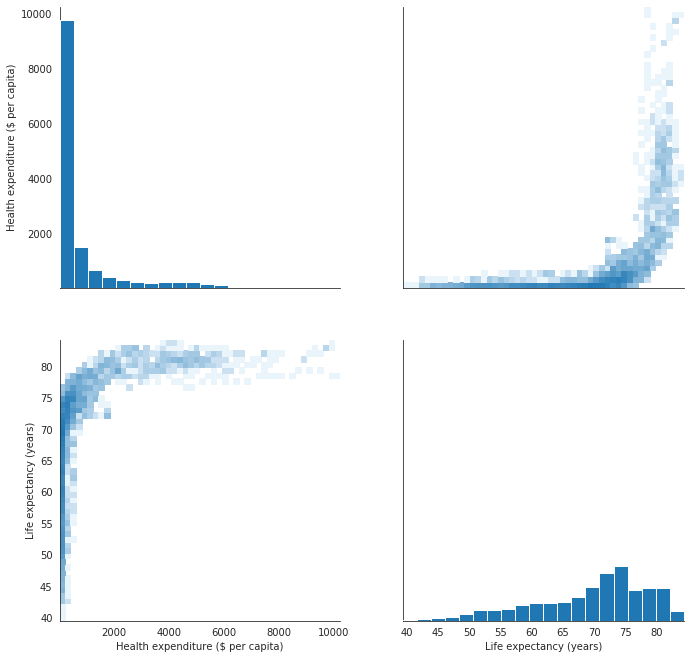

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
sns.set_style("white") 

g = sns.PairGrid(df_xy_expend.loc[:,['Health expenditure ($ per capita)', 'Life expectancy (years)']])
g.map_diag(plt.hist, bins=20)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, norm=LogNorm(), cmap=cmap, cmin=1, **kws)

g.map_offdiag(pairgrid_heatmap, bins=50)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)

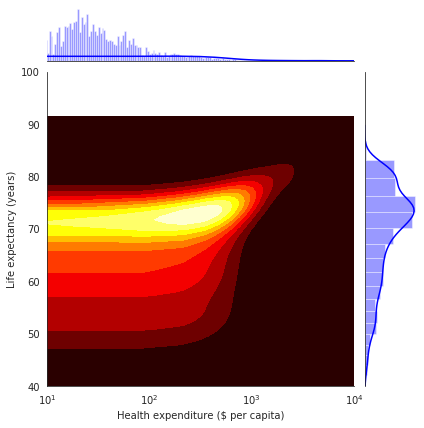

In [15]:
mybins=np.logspace(0,np.log(10000),500)


g = sns.JointGrid('Health expenditure ($ per capita)', 'Life expectancy (years)', df_xy_expend.loc[:,['Health expenditure ($ per capita)', 'Life expectancy (years)']],xlim=[10,10000],ylim=[40,100])
g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue',bins=mybins)
g.plot_joint(sns.kdeplot, cmap="hot", shade=True)
ax = g.ax_joint
ax.set_xscale('log')

g.ax_marg_x.set_xscale('log')

According to the charts, we'll consider logarithm of health expenditure

In [16]:
xlog = np.log(df_xy_expend.loc[:,'Health expenditure ($ per capita)'])
y = df_xy_expend.loc[:,'Life expectancy (years)']
corr = np.corrcoef(xlog, y)
print(corr)

[[1.         0.79986711]
 [0.79986711 1.        ]]


### Regression model based on health expenditure

In [17]:
# 
X_train, X_test, y_train, y_test = train_test_split(xlog.values.reshape(-1,1), y, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(np.log(df_xy_expend.loc[:,'Health expenditure ($ per capita)']), y, test_size=0.2, random_state=42)
# Create linear regression object
model = linear_model.Lasso(alpha=0.01)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)
# The root mean squared error
print('Root mean squared error: %.2f (years)' % np.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print('Mean absolute error: %.2f (years)' % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [4.34111622]
Intercept: 
 45.883623289626925
Root mean squared error: 5.27 (years)
Mean absolute error: 3.86 (years)
Coefficient of determination: 0.66


### Regression model based on death cause ratios and health expenditure

In [18]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

df_xy_expend["Health expenditure (log)"] = xlog
mycolumns = df_xy_expend.columns[4:-5].append(pd.Index(["Health expenditure (log)"]))
x = df_xy_expend.loc[:,mycolumns]

x_features1 = normalize(x.iloc[:,0:-1], axis=1)
x_features2 = np.reshape(x.iloc[:,-1].values,(-1,1))

x_features2 = MinMaxScaler().fit_transform(np.reshape(x.iloc[:,-1].values,(-1,1)))

x = np.concatenate((x_features1,x_features2), axis=1)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Create linear regression object
model = linear_model.Lasso(alpha=0.01)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)
# The mean squared error
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-0.         -3.22664483  0.         -0.         -0.          8.2125451
 20.92460111  0.          0.          0.          0.          0.
 15.23699147  0.         -0.         -3.87907751 -0.         -0.
 -8.31159873  0.         -0.          3.73939124 -0.         -1.77688494
 -0.          0.         -6.08079773 -0.         -0.          0.
  0.         -0.          8.22239798]
Intercept: 
 54.1234080764856
Root mean squared error: 2.50
Mean absolute error: 1.85
Coefficient of determination: 0.92


In [20]:
df_feature = pd.DataFrame({"Feature":mycolumns.values})
df_feature["coef"] = model.coef_
df_feature["abs_coef"] = abs(model.coef_)
df_feature.sort_values(by="abs_coef", ascending=False)

,Feature,coef,abs_coef
6,Dementia (deaths),20.924601,20.924601
12,Cancers (deaths),15.236991,15.236991
18,HIV/AIDS (deaths),-8.311599,8.311599
32,Health expenditure (log),8.222398,8.222398
5,Cardiovascular diseases (deaths),8.212545,8.212545
26,Diarrheal diseases (deaths),-6.080798,6.080798
15,Malaria (deaths),-3.879078,3.879078
21,Road injuries (deaths),3.739391,3.739391
1,Lower respiratory infections (deaths),-3.226645,3.226645
23,Neonatal disorders (deaths),-1.776885,1.776885


High 'Dementia' ratios, Cancers and Health expenditure imply higher life expectancy. While 'HIV/AIDS' or Diarrheal diseases imply lower life expectancy.

Which predictions get the highest errors with this model?

In [21]:
df_test =  df_xy_expend.loc[y_test.index,:]
df_test["pred"] = y_pred
df_test["error"] = abs(df_test.loc[:,'Life expectancy (years)']-df_test.loc[:,'pred'])
df_test.sort_values(by="error", ascending=False).head(10)

,Entity,Code,Year,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Terrorism (deaths),Cardiovascular diseases (deaths),...,Suicide (deaths),Conflict (deaths),Diabetes (deaths),Poisonings (deaths),Life expectancy (years),Indicator Code,Health expenditure ($ per capita),Health expenditure (log),pred,error
2547,Sierra Leone,SLE,2003,NaN,2224.823359,8870.443846,176.653116,2253.538265,4.0,7723.792496,...,298.753227,5.000000,667.731336,77.715753,42.419,sha11.HF,28.866207,3.362672,55.124465,12.705465
1641,Lesotho,LSO,2008,NaN,215.610550,1875.169015,2.316926,233.432129,4.0,4375.539447,...,536.649042,0.000000,1063.585008,42.451933,43.384,sha11.HF,68.183405,4.222201,53.016244,9.632244
1637,Lesotho,LSO,2004,NaN,222.842946,1874.443365,2.449932,241.177563,4.0,4242.693292,...,504.024675,0.000000,967.452077,41.753681,43.083,sha11.HF,41.985157,3.737316,52.064806,8.981806
1644,Lesotho,LSO,2011,NaN,197.765243,1763.630637,2.052939,208.981405,4.0,4264.727181,...,530.637635,0.000000,1087.372706,41.285187,46.207,sha11.HF,121.377530,4.798906,54.828112,8.621112
52,Angola,AGO,2000,NaN,5331.831221,25037.030956,340.451037,12906.638430,178.0,17051.062050,...,1222.298935,3377.998233,2095.815525,322.797829,46.522,sha11.HF,12.963033,2.562102,54.744690,8.222690
2552,Sierra Leone,SLE,2008,NaN,1884.164818,8176.872036,186.582861,1967.831155,4.0,8376.898961,...,346.202070,7.000000,768.439816,79.586083,47.508,sha11.HF,40.127654,3.692066,55.499837,7.991837
393,Botswana,BWA,2017,NaN,71.144706,767.699836,3.894030,78.087980,4.0,2547.833646,...,200.124418,0.000000,668.337270,22.903643,68.812,sha11.HF,465.929318,6.144034,61.174666,7.637334
2745,Swaziland,SWZ,2002,NaN,114.463971,889.072963,2.771520,127.700647,4.0,1463.023389,...,216.731398,0.000000,457.276495,21.850626,44.410,sha11.HF,73.180506,4.292929,51.621268,7.211268
2130,Niger,NER,2017,NaN,7814.647352,19709.963177,3.894030,2197.827298,148.0,13967.470400,...,752.658668,308.000002,1685.393554,258.189671,61.599,sha11.HF,29.261650,3.376278,54.616645,6.982355
56,Angola,AGO,2004,NaN,5390.639339,24618.243283,407.188335,11690.169886,4.0,18115.235436,...,1335.692149,50.000000,2328.943570,352.092551,49.263,sha11.HF,49.526721,3.902512,56.087940,6.824940


Let's simplify the model to features

In [22]:
x = df_xy_expend.loc[y_test.index,mycolumns]
x_features1 = normalize(x.iloc[:,0:-1], axis=1)

x_features2 = np.reshape(x.iloc[:,-1].values,(-1,1))
x_features2 = MinMaxScaler().fit_transform(np.reshape(x.iloc[:,-1].values,(-1,1)))

x = np.concatenate((x_features1,x_features2), axis=1)

K=5

top_features = df_feature.sort_values(by="abs_coef", ascending=False).index[0:K]

y_pred = model.intercept_+np.sum(x[:,top_features] * model.coef_[top_features], axis=1)
print('Coefficient of determination (R2): {:.2}'.format(r2_score(y_test, y_pred)))


Coefficient of determination (R2): 0.87


Which predictions get the highest errors with this simplified model?

In [23]:
df_test["predK"] = y_pred
df_test["errorK"] = abs(df_test.loc[:,'Life expectancy (years)']-df_test.loc[:,'predK'])
df_test.sort_values(by="errorK", ascending=False).head(10)

,Entity,Code,Year,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Terrorism (deaths),Cardiovascular diseases (deaths),...,Diabetes (deaths),Poisonings (deaths),Life expectancy (years),Indicator Code,Health expenditure ($ per capita),Health expenditure (log),pred,error,predK,errorK
2547,Sierra Leone,SLE,2003,NaN,2224.823359,8870.443846,176.653116,2253.538265,4.0,7723.792496,...,667.731336,77.715753,42.419,sha11.HF,28.866207,3.362672,55.124465,12.705465,60.740662,18.321662
2552,Sierra Leone,SLE,2008,NaN,1884.164818,8176.872036,186.582861,1967.831155,4.0,8376.898961,...,768.439816,79.586083,47.508,sha11.HF,40.127654,3.692066,55.499837,7.991837,60.780747,13.272747
52,Angola,AGO,2000,NaN,5331.831221,25037.030956,340.451037,12906.638430,178.0,17051.062050,...,2095.815525,322.797829,46.522,sha11.HF,12.963033,2.562102,54.744690,8.222690,59.676486,13.154486
56,Angola,AGO,2004,NaN,5390.639339,24618.243283,407.188335,11690.169886,4.0,18115.235436,...,2328.943570,352.092551,49.263,sha11.HF,49.526721,3.902512,56.087940,6.824940,60.979994,11.716994
1187,Guinea,GIN,2001,NaN,3125.805992,15440.572815,520.460186,3720.435641,4.0,12946.361947,...,1225.590959,138.486695,51.255,sha11.HF,15.344747,2.730773,56.983006,5.728006,62.051294,10.796294
1188,Guinea,GIN,2002,NaN,3052.960705,15000.388913,517.820179,3551.650612,4.0,13270.388986,...,1274.009063,136.388915,51.484,sha11.HF,17.848422,2.881915,57.236212,5.752212,62.279631,10.795631
1808,Mali,MLI,2001,NaN,5277.272270,10480.910975,597.569549,9387.156321,4.0,12364.098622,...,1130.832131,203.518594,48.758,sha11.HF,15.867673,2.764284,53.294016,4.536016,59.185646,10.427646
2132,Nigeria,NGA,2001,NaN,57790.370459,225903.027420,4530.167827,35327.922605,3.0,111172.969574,...,8618.179764,1430.421271,46.510,sha11.HF,18.590287,2.922639,51.001204,4.491204,56.896614,10.386614
1641,Lesotho,LSO,2008,NaN,215.610550,1875.169015,2.316926,233.432129,4.0,4375.539447,...,1063.585008,42.451933,43.384,sha11.HF,68.183405,4.222201,53.016244,9.632244,53.714754,10.330754
578,Chad,TCD,2004,NaN,4062.983000,17963.604784,429.049818,4634.525918,4.0,10011.746885,...,1022.283555,155.239621,48.270,sha11.HF,28.299266,3.342836,52.266636,3.996636,58.395121,10.125121


In [24]:
df_test[(df_test.Entity == "United States") | (df_test["Entity"] == "Angola")]

,Entity,Code,Year,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Terrorism (deaths),Cardiovascular diseases (deaths),...,Diabetes (deaths),Poisonings (deaths),Life expectancy (years),Indicator Code,Health expenditure ($ per capita),Health expenditure (log),pred,error,predK,errorK
3070,United States,USA,2011,43,1390.852657,82789.762064,26.045914,3511.414371,0.0,817311.831013,...,63393.048111,1673.374680,78.777,sha11.HF,8169.907676,9.008213,81.159352,2.382352,81.351539,2.574539
3074,United States,USA,2015,28,1363.725635,89325.546305,28.505689,4241.455808,54.0,857259.647131,...,63504.541860,1783.199360,78.910,sha11.HF,9538.070211,9.163046,81.510147,2.600147,81.716329,2.806329
3060,United States,USA,2001,NaN,1859.244908,80134.197104,29.326004,2888.741118,3008.0,907699.002266,...,67801.315040,1311.504622,76.962,sha11.HF,4910.724166,8.499177,79.273483,2.311483,79.364470,2.402470
52,Angola,AGO,2000,NaN,5331.831221,25037.030956,340.451037,12906.638430,178.0,17051.062050,...,2095.815525,322.797829,46.522,sha11.HF,12.963033,2.562102,54.744690,8.222690,59.676486,13.154486
63,Angola,AGO,2011,NaN,4009.676209,18432.266719,414.578878,6927.259882,4.0,19262.887818,...,2859.620923,321.681905,56.330,sha11.HF,122.117804,4.804986,57.668468,1.338468,62.112499,5.782499
3061,United States,USA,2002,NaN,1795.443407,81069.248935,28.866735,2947.367897,4.0,901781.912147,...,68963.476398,1385.518028,77.124,sha11.HF,5328.275560,8.580783,79.460929,2.336929,79.561248,2.437248
67,Angola,AGO,2015,NaN,3488.015480,15444.559841,374.902994,5044.594769,4.0,20470.493649,...,3274.761270,297.385390,59.398,sha11.HF,108.680672,4.688414,58.755235,0.642765,62.872393,3.474393
58,Angola,AGO,2006,NaN,4861.800222,23182.950021,422.008847,10452.136875,4.0,18244.212183,...,2420.561519,350.455127,51.143,sha11.HF,69.424699,4.240243,56.148569,5.005569,61.165435,10.022435
56,Angola,AGO,2004,NaN,5390.639339,24618.243283,407.188335,11690.169886,4.0,18115.235436,...,2328.943570,352.092551,49.263,sha11.HF,49.526721,3.902512,56.087940,6.824940,60.979994,11.716994
69,Angola,AGO,2017,NaN,3231.569615,14508.404992,3.894030,4432.241559,7.0,21784.661826,...,3558.147037,285.432397,60.379,sha11.HF,114.459653,4.740222,59.569185,0.809815,63.521985,3.142985


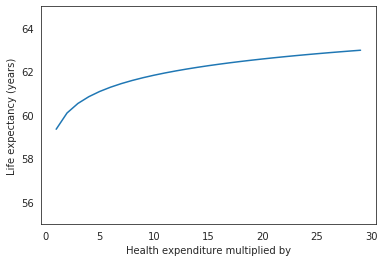

In [25]:
index_example = ((df_test["Entity"] == "Angola") & (df_test["Year"] == 2017))

myval = df_test.loc[index_example, 'Health expenditure (log)'].values

x = df_test.loc[:,mycolumns]

preds =[]
for i in range(1,30): 
    x.loc[index_example,'Health expenditure (log)'] = myval + np.log(i)

    x_features1 = normalize(x.iloc[:,0:-1], axis=1)
    x_features2 = MinMaxScaler().fit_transform((x.iloc[:,-1].values+np.log(i)).reshape(-1,1))

    x_norm = np.concatenate((x_features1,x_features2), axis=1)

    preds.extend(model.intercept_+np.sum(x_norm[index_example,:] * model.coef_[:], axis=1))

plt.ylim(55,65)
plt.xlabel('Health expenditure multiplied by')
plt.ylabel('Life expectancy (years)')
plt.plot(range(1,30),preds)

According to this model... if we double health expenditure in Angola from 114 to 228 dollars, life expectancy would increase 1 year. And 5x expenditure would increase life expectancy 2 years